# Gradient Descent

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return x ** 2


def f_grad(x):
    return 2 * x

In [3]:
def gd(eta, f_grad):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(float(x))
    print(f'epoch 10, x: {x:f}')
    return results

results = gd(0.2, f_grad)

epoch 10, x: 0.060466


In [14]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)

    plt.plot(f_line, f(f_line), label='f(x)')
    plt.plot(results, [f(x) for x in results], '-o', label='Gradient Descent')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

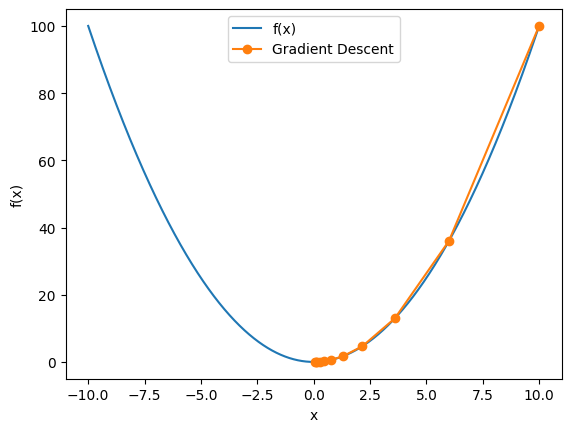

In [15]:
show_trace(results, f)

## Learning Rate

epoch 10, x: 3.486784


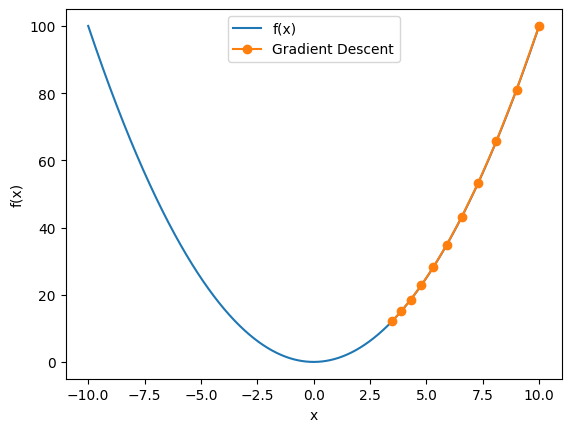

In [16]:
show_trace(gd(0.05, f_grad), f)

epoch 10, x: 61.917364


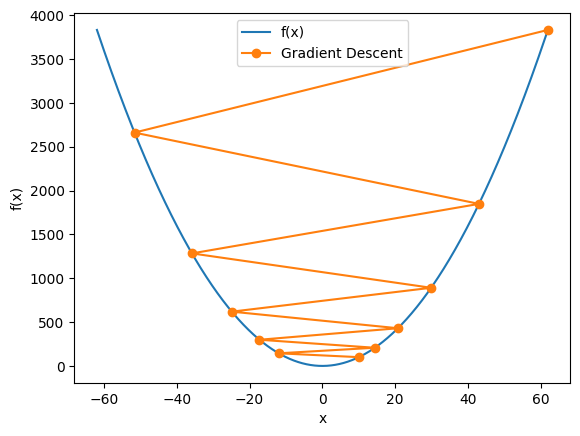

In [17]:
show_trace(gd(1.1, f_grad), f)

epoch 10, x: 10240.000000


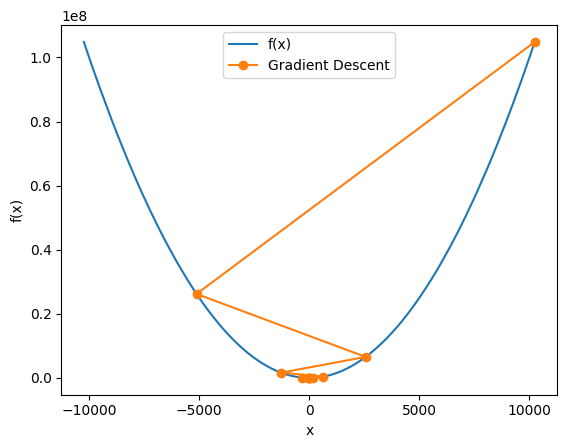

epoch 10, x: 61.917364


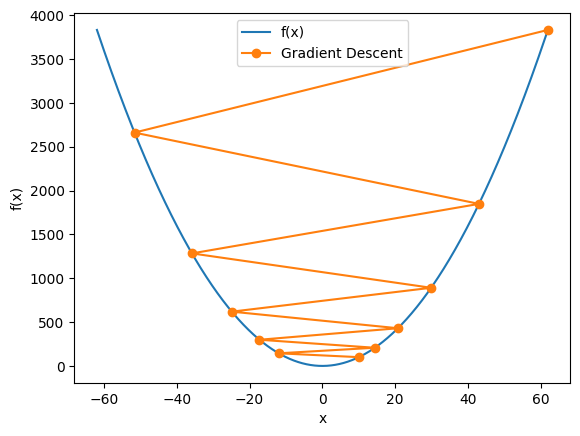

epoch 10, x: 10.000000


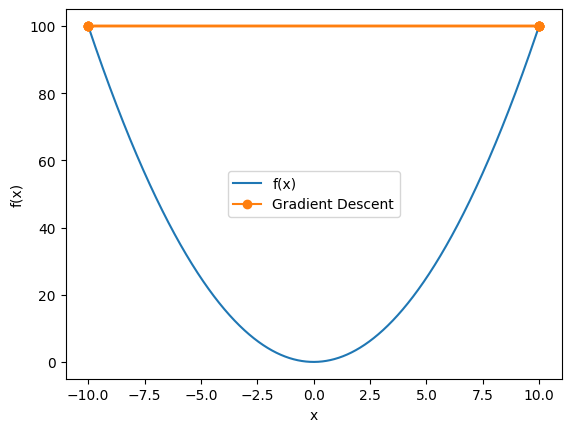

epoch 10, x: 0.060466


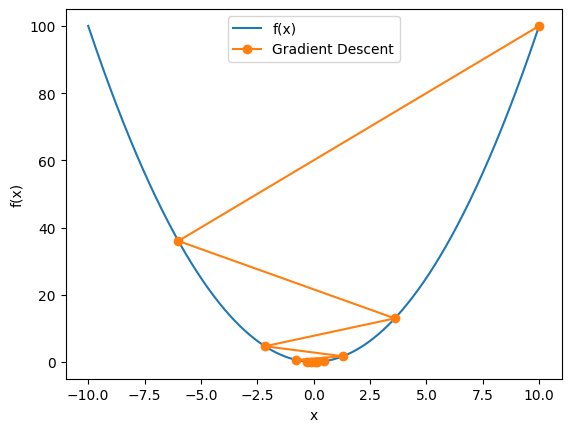

epoch 10, x: 0.000001


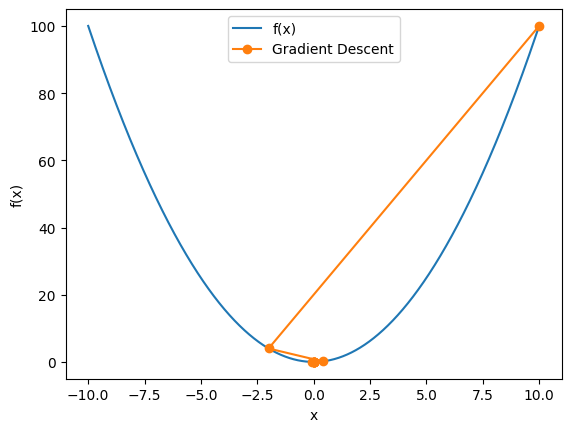

epoch 10, x: 0.000000


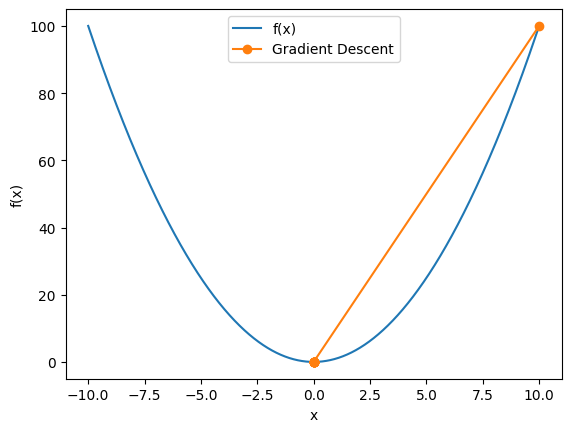

epoch 10, x: 0.000001


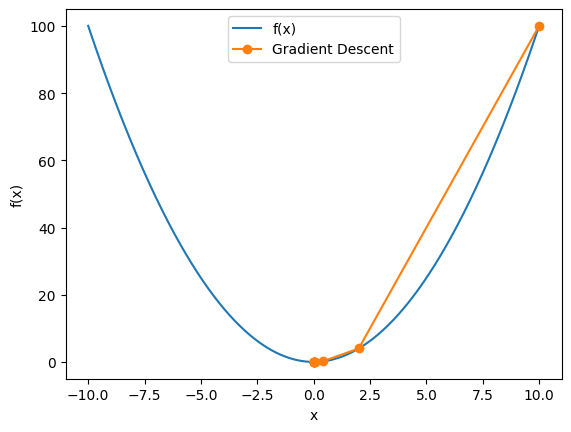

epoch 10, x: 0.060466


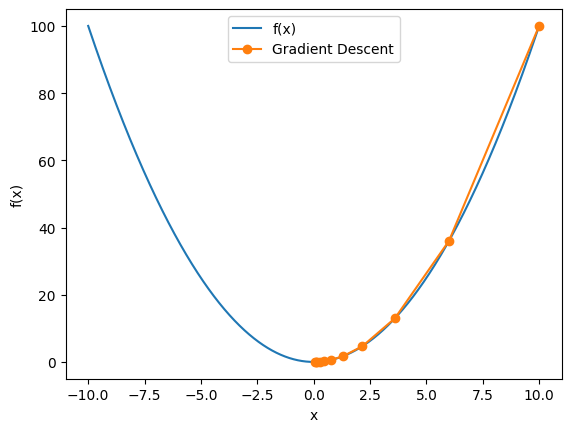

epoch 10, x: 1.073742


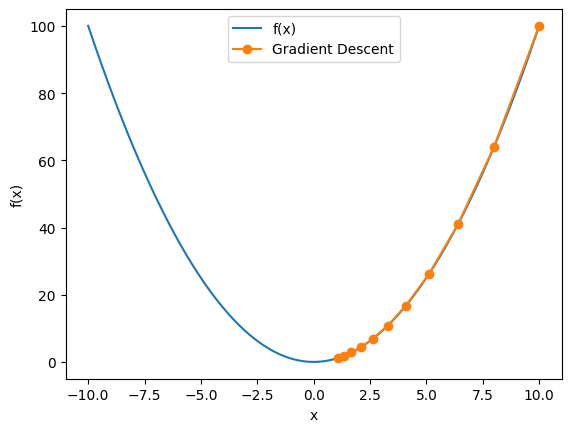

epoch 10, x: 3.486784


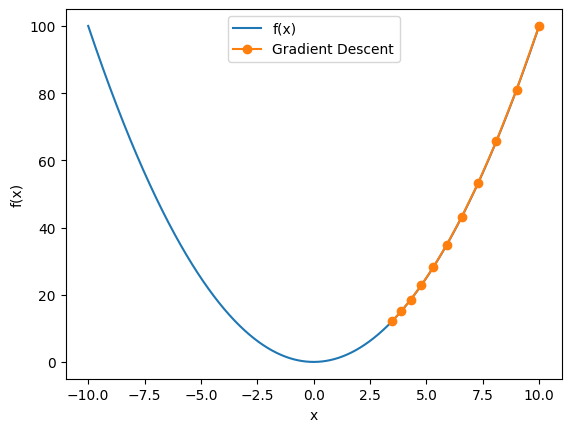

In [19]:
for i in [1.5, 1.1, 1.0, 0.8, 0.6, 0.5, 0.4, 0.2, 0.1, 0.05]:
    show_trace(gd(i, f_grad), f)

### Local Minima

In [20]:
c = torch.tensor(0.15 * np.pi)

def f(x):
    return x * torch.cos(c * x)

def f_grad(x):
    return torch.cos(c * x) - c * x * torch.sin(c * x)

epoch 10, x: -1.528166


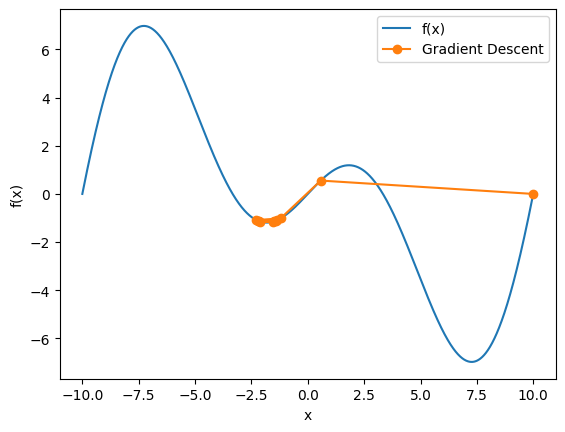

In [21]:
show_trace(gd(2, f_grad), f)

epoch 10, x: 4.804714


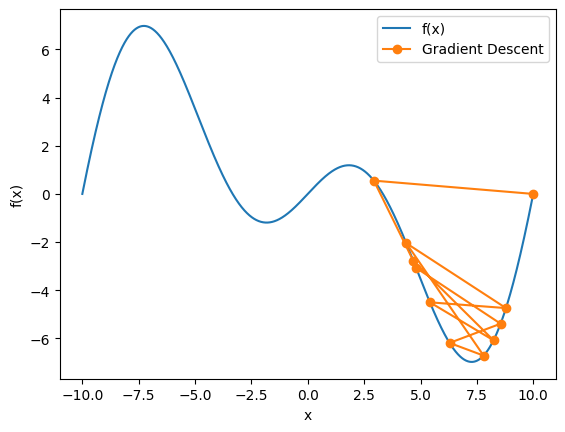

epoch 10, x: 7.424407


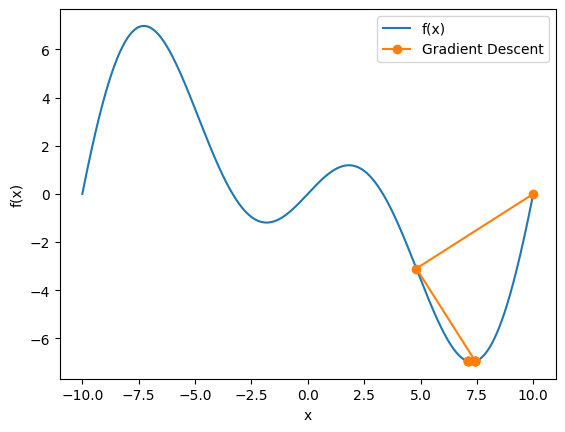

epoch 10, x: 7.330616


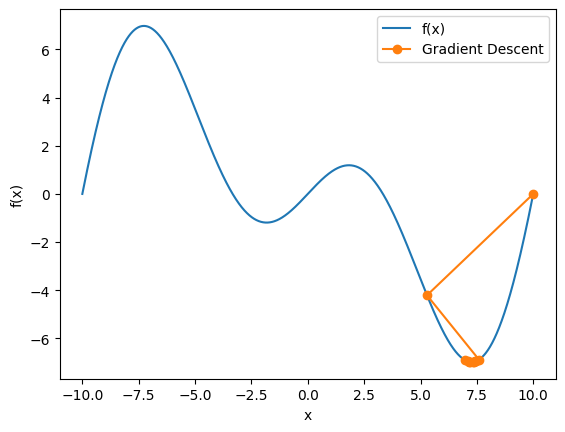

epoch 10, x: 7.269787


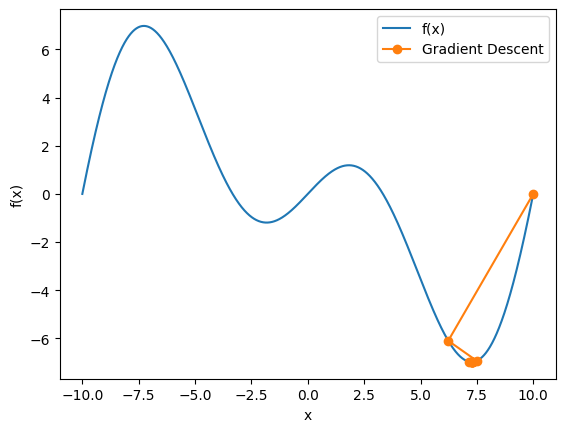

epoch 10, x: 7.269388


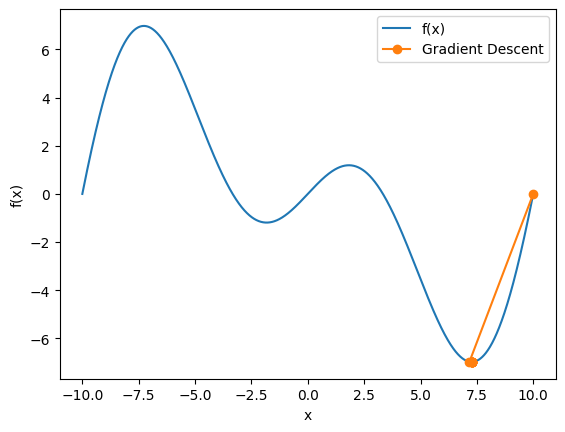

epoch 10, x: 7.269388


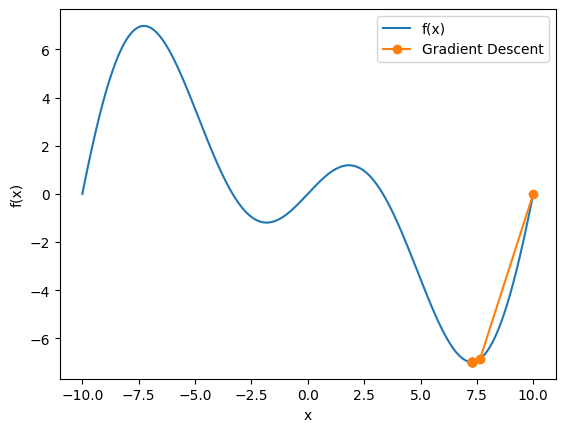

epoch 10, x: 7.269394


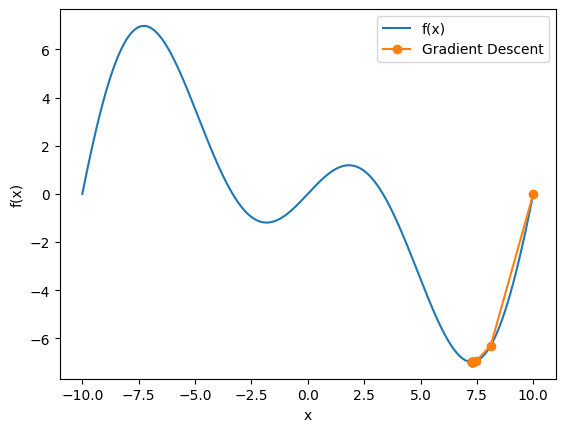

epoch 10, x: 7.295479


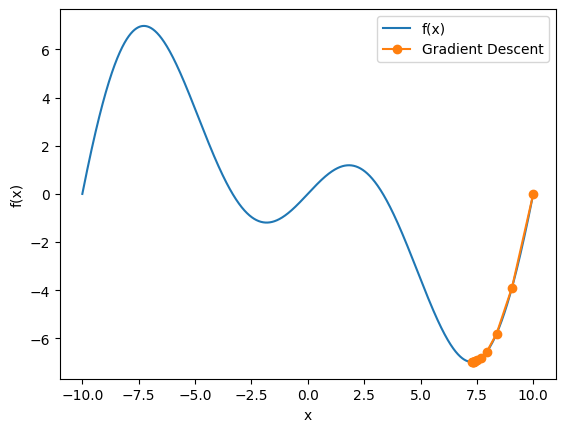

epoch 10, x: 7.603766


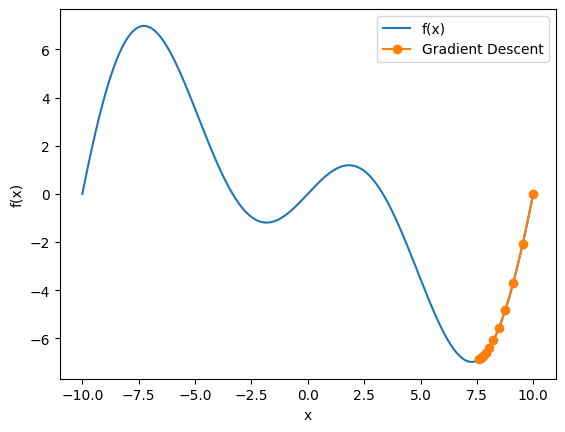

epoch 10, x: 8.284779


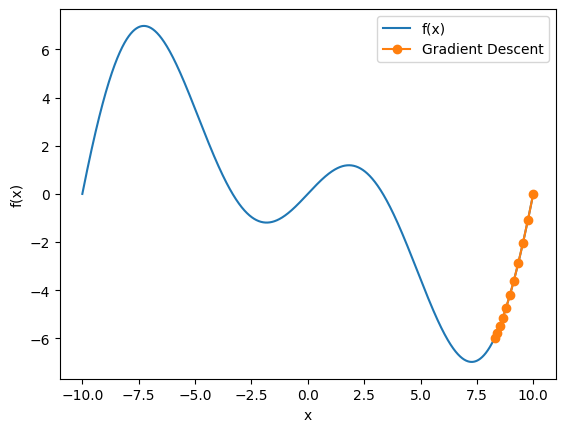

In [22]:
for i in [1.5, 1.1, 1.0, 0.8, 0.6, 0.5, 0.4, 0.2, 0.1, 0.05]:
    show_trace(gd(i, f_grad), f)

### Multivariate Gradient Descent

In [23]:
def train_2d(trainer, steps=20, f_grad=None):  #@save
    """Optimize a 2D objective function with a customized trainer."""
    # `s1` and `s2` are internal state variables that will be used in Momentum, adagrad, RMSProp
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def show_trace_2d(f, results):  #@save
    """Show the trace of 2D variables during optimization."""
    plt.figure(figsize=(8, 6))
    plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1),
                            torch.arange(-3.0, 1.0, 0.1), indexing='ij')
    plt.contour(x1.numpy(), x2.numpy(), f(x1, x2).numpy(), colors='#1f77b4')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

epoch 20, x1: -0.057646, x2: -0.000073


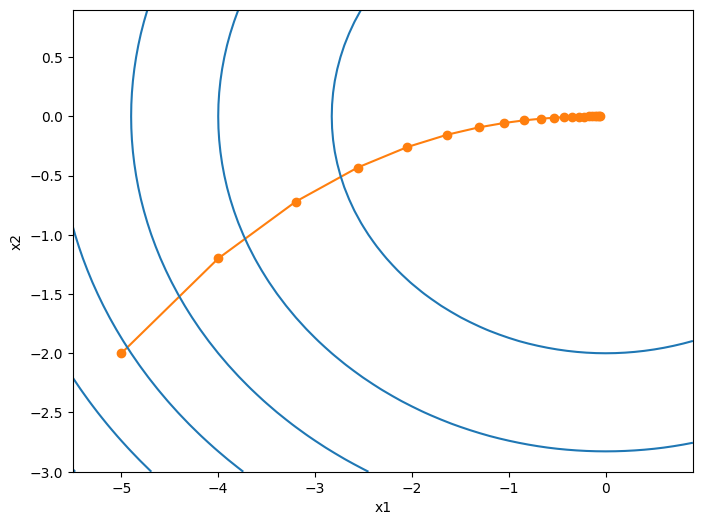

In [24]:
def f_2d(x1, x2):  # Objective function
    return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2):  # Gradient of the objective function
    return (2 * x1, 4 * x2)

def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

# Adaptive Method

## Newton's Method

epoch 10, x: tensor(0.)


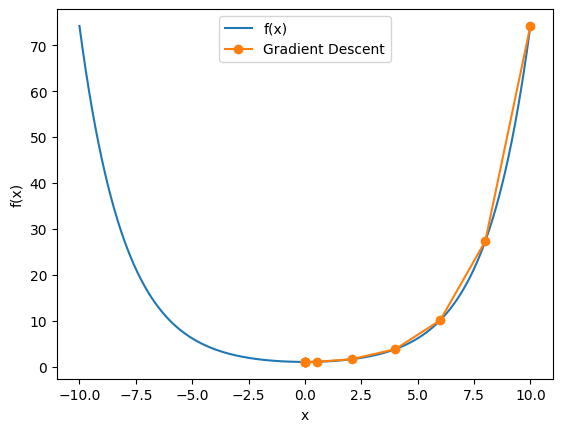

In [25]:
c = torch.tensor(0.5)

def f(x):  # Objective function
    return torch.cosh(c * x)

def f_grad(x):  # Gradient of the objective function
    return c * torch.sinh(c * x)

def f_hess(x):  # Hessian of the objective function
    return c**2 * torch.cosh(c * x)

def newton(eta=1):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x) / f_hess(x)
        results.append(float(x))
    print('epoch 10, x:', x)
    return results

show_trace(newton(), f)

epoch 10, x: tensor(26.8341)


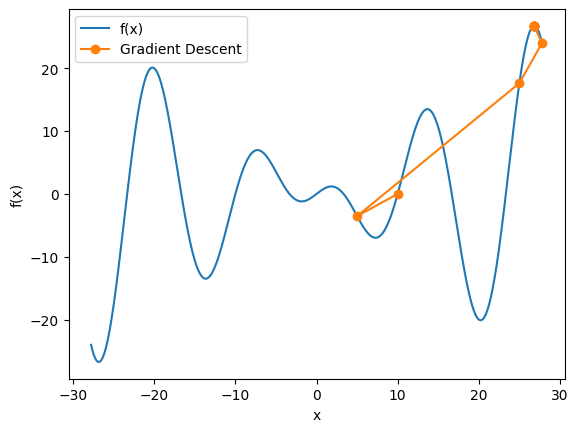

In [26]:
c = torch.tensor(0.15 * np.pi)

def f(x):  # Objective function
    return x * torch.cos(c * x)

def f_grad(x):  # Gradient of the objective function
    return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x):  # Hessian of the objective function
    return - 2 * c * torch.sin(c * x) - x * c**2 * torch.cos(c * x)

show_trace(newton(), f)

epoch 10, x: tensor(7.2699)


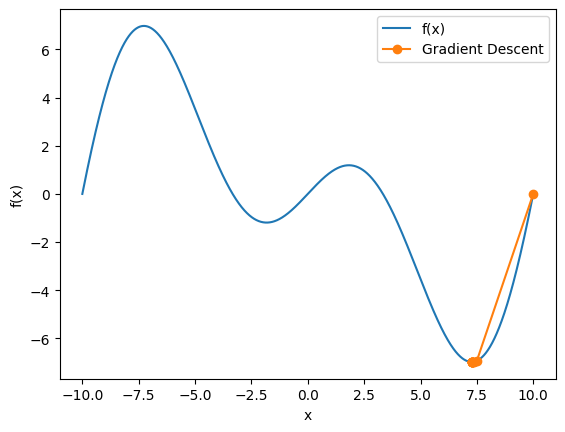

In [27]:
show_trace(newton(0.5), f)